In [87]:
import pandas as pd

In [88]:
df = pd.read_csv("/kaggle/input/100000-diabetes-clinical-dataset/diabetes_dataset.csv")

In [89]:
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


In [90]:
# columns in dataset
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [91]:
# first 5 rows
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [92]:
# last 5 rows
df.tail()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0
99999,2016,Male,13.0,Wyoming,0,0,0,1,0,0,0,No Info,17.16,5.0,90,0


 #  Cleaning and handling missing value

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [94]:
# check for null (NaN) values
print(df.isnull())
print(df.isnull().sum())

        year  gender    age  location  race:AfricanAmerican  race:Asian  \
0      False   False  False     False                 False       False   
1      False   False  False     False                 False       False   
2      False   False  False     False                 False       False   
3      False   False  False     False                 False       False   
4      False   False  False     False                 False       False   
...      ...     ...    ...       ...                   ...         ...   
99995  False   False  False     False                 False       False   
99996  False   False  False     False                 False       False   
99997  False   False  False     False                 False       False   
99998  False   False  False     False                 False       False   
99999  False   False  False     False                 False       False   

       race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               Fa

In [95]:
# Check unique values in each column to identify hidden missing values
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

year: [2020 2015 2016 2019 2018 2021 2022]
gender: ['Female' 'Male' 'Other']
age: [32.   29.   18.   41.   52.   66.   49.   15.   51.   42.   53.    3.
 40.   64.   23.    2.   80.   12.   50.   69.   75.   72.   46.   47.
 14.   24.   55.   13.   31.   38.   67.   61.   79.    8.   11.   71.
 25.    5.    6.   28.    4.   54.   43.   65.    7.   48.    1.32 63.
 59.   39.   19.   62.   45.   44.   73.   10.   26.   22.   68.   57.
  0.8  60.   30.   58.   77.   56.   37.   20.   21.    9.   36.   35.
  1.   17.   78.   16.    0.48 27.   70.    0.64  1.56  1.72 74.    1.16
 33.   34.   76.    1.08  0.16  1.24  0.08  0.72  0.32  0.24  0.4   1.64
  1.88  1.4   1.48  0.56  0.88  1.8 ]
location: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Miss

In [96]:
# check for duplicates
print("Duplicate rows:",df.duplicated().sum())

Duplicate rows: 14


In [97]:
# drop duplicates (if any)
df = df.drop_duplicates()

 # Feature selection and engineering

In [98]:
print(df.columns)

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [99]:
# Drop Unnecessary Columns (does not helps in prediction; whether person is diabetic or not)
# 1. year of data entry
# 2. location of person
df = df.drop(columns=['year', 'location'])

In [100]:
 # Label Encoding (for Binary categories like gender)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})

In [101]:
 # One-Hot Encoding (for multiple categories like smoking_history)
print("smoking_history unique values: ",df['smoking_history'].unique())
df['smoking_history'] = df['smoking_history'].str.strip()
df = pd.get_dummies(df, columns=['smoking_history'])
# df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)
df.columns = df.columns.str.strip().str.replace(' ', '_')
print(df.columns)

smoking_history unique values:  ['never' 'not current' 'current' 'No Info' 'ever' 'former']
Index(['gender', 'age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian',
       'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes',
       'smoking_history_No_Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not_current'],
      dtype='object')


In [102]:
print("\nEncoded smoking_history columns:")
print([col for col in df.columns if 'smoking_history' in col])


Encoded smoking_history columns:
['smoking_history_No_Info', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not_current']


# Scaling Numerical Columns (BMI, hbA1c_level, blood_glucose_level)

# Before Scaling Vituals

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


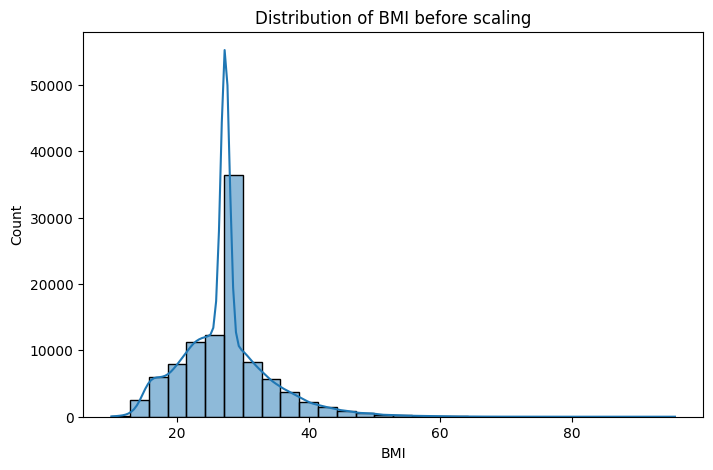

In [104]:
# Histogram plot for Distribution of bmi (before scaling)
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI before scaling')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


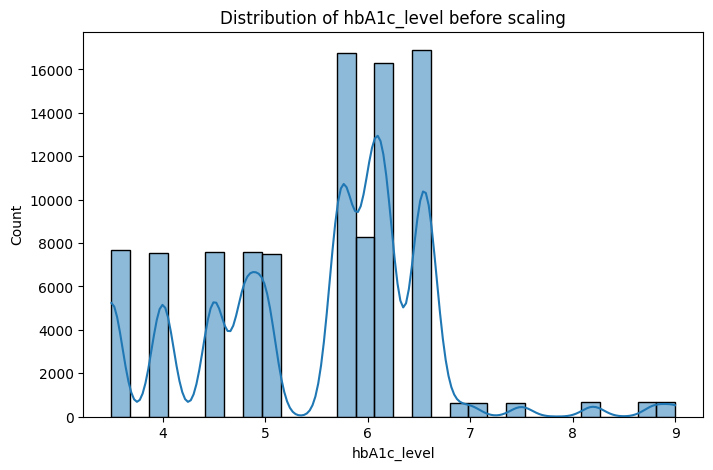

In [105]:
# Histogram plot for Distribution of hbA1c_level (before scaling)
plt.figure(figsize=(8, 5))
sns.histplot(df['hbA1c_level'], bins=30, kde=True)
plt.title('Distribution of hbA1c_level before scaling')
plt.xlabel('hbA1c_level')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


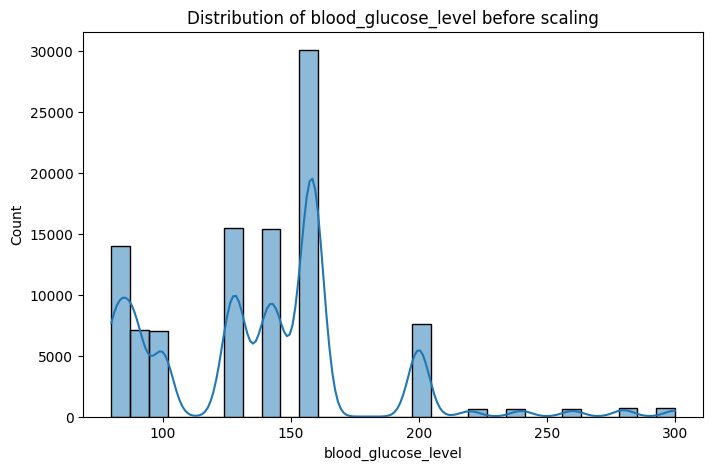

In [106]:
# Histogram plot for Distribution of blood_glucose_level (before scaling)
plt.figure(figsize=(8, 5))
sns.histplot(df['blood_glucose_level'], bins=30, kde=True)
plt.title('Distribution of blood_glucose_level before scaling')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count')
plt.show()

# Standard Scale

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['bmi', 'hbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(df[['bmi', 'hbA1c_level', 'blood_glucose_level']])

# After Scaling Vituals

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

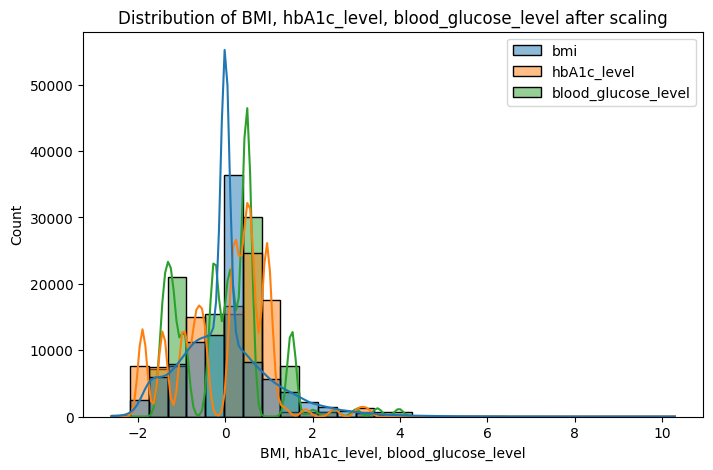

In [108]:
# Histogram plot for Distribution of bmi, hbA1c_level, blood_glucose_level (after scaling)
plt.figure(figsize=(8, 5))
sns.histplot(df[['bmi','hbA1c_level','blood_glucose_level']], bins=30, kde=True)
plt.title('Distribution of BMI, hbA1c_level, blood_glucose_level after scaling')
plt.xlabel('BMI, hbA1c_level, blood_glucose_level')
plt.ylabel('Count')
plt.show()

In [109]:
# Check BMI range (Z-score normalization)
print(df['bmi'].describe())

count    9.998600e+04
mean    -1.918734e-17
std      1.000005e+00
min     -2.608137e+00
25%     -5.560717e-01
50%     -1.155918e-04
75%      3.403887e-01
max      1.030089e+01
Name: bmi, dtype: float64


In [110]:
# Check hbA1c_level range (Z-score normalization)
print(df['hbA1c_level'].describe())

count    9.998600e+04
mean     9.495601e-16
std      1.000005e+00
min     -1.893693e+00
25%     -6.794980e-01
50%      2.544982e-01
75%      6.280967e-01
max      3.243286e+00
Name: hbA1c_level, dtype: float64


In [111]:
# Check blood_glucose_level range (Z-score normalization)
print(df['blood_glucose_level'].describe())

count    9.998600e+04
mean    -2.060862e-16
std      1.000005e+00
min     -1.426227e+00
25%     -9.349289e-01
50%      4.766777e-02
75%      5.144012e-01
max      3.978054e+00
Name: blood_glucose_level, dtype: float64


#  Ensuring Data Integrity and Consistency

In [112]:
# Check data types
df.dtypes

gender                           int64
age                            float64
race:AfricanAmerican             int64
race:Asian                       int64
race:Caucasian                   int64
race:Hispanic                    int64
race:Other                       int64
hypertension                     int64
heart_disease                    int64
bmi                            float64
hbA1c_level                    float64
blood_glucose_level            float64
diabetes                         int64
smoking_history_No_Info           bool
smoking_history_current           bool
smoking_history_ever              bool
smoking_history_former            bool
smoking_history_never             bool
smoking_history_not_current       bool
dtype: object

In [113]:
df.duplicated().sum()

886

In [114]:
df = df.drop_duplicates()

In [115]:
df.duplicated().sum()

0

In [116]:
# Check age level
print(df['age'].describe())

count    99100.000000
mean        41.842532
std         22.485614
min          0.080000
25%         24.000000
50%         43.000000
75%         59.000000
max         80.000000
Name: age, dtype: float64


#  Summary statistics and insights

In [129]:
df.select_dtypes(include='number').describe()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,99100.000000,99100.000000,99100.000000,99100.000000,99100.000000,99100.000000,99100.000000,99100.000000,99100.000000,99100.000000,99100.000000,99100.000000,99100.000000
mean,0.415288,41.842532,0.202230,0.200030,0.198819,0.199011,0.199909,0.075459,0.039738,0.000009,0.001299,0.000863,0.085762
std,0.493143,22.485614,0.401665,0.400025,0.399114,0.399258,0.399934,0.264132,0.195343,1.004448,1.000420,1.001182,0.280013
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.608137,-1.893693,-1.426227,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.563605,-0.679498,-0.934929,0.000000
50%,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000116,0.254498,0.047668,0.000000
75%,1.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.349429,0.628097,0.514401,0.000000
max,2.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.300892,3.243286,3.978054,1.000000


In [118]:
# Check distribution of diabetes column
print(df['diabetes'].value_counts())
print(df['diabetes'].value_counts(normalize=True))
# 0 -> Non-diabetic (90601)
# 1 -> diabetic (8499)

diabetes
0    90601
1     8499
Name: count, dtype: int64
diabetes
0    0.914238
1    0.085762
Name: proportion, dtype: float64


In [119]:
correlation_matrix = df.corr()
correlation_matrix

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,smoking_history_No_Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not_current
gender,1.000000,-0.029896,0.001845,0.000141,-0.004174,0.001983,0.000191,0.014059,0.077893,-0.023101,0.019708,0.017195,0.037230,0.054849,0.026011,0.010827,0.048564,-0.099198,-0.011091
age,-0.029896,1.000000,-0.001913,0.003268,0.003979,0.002484,-0.007799,0.252977,0.234937,0.339372,0.102586,0.112084,0.260189,-0.282347,0.031748,0.066565,0.218248,0.066997,0.068585
race:AfricanAmerican,0.001845,-0.001913,1.000000,-0.251765,-0.250812,-0.250963,-0.251670,-0.001073,-0.000564,-0.001259,0.001242,0.002005,0.004418,-0.004280,-0.004510,0.001948,0.001321,0.004052,0.002657
race:Asian,0.000141,0.003268,-0.251765,1.000000,-0.249101,-0.249251,-0.249953,0.004028,0.006235,0.005280,-0.000401,0.000449,0.003869,0.004891,-0.006487,0.001419,-0.000784,-0.001112,0.000123
race:Caucasian,-0.004174,0.003979,-0.250812,-0.249101,1.000000,-0.248307,-0.249007,0.000405,-0.001417,-0.002127,-0.004286,0.004494,-0.001785,-0.004481,0.003329,0.001917,-0.002402,0.001443,0.003283
race:Hispanic,0.001983,0.002484,-0.250963,-0.249251,-0.248307,1.000000,-0.249156,0.001224,-0.000868,0.002369,0.000779,-0.002821,-0.001480,0.001665,0.008469,-0.002162,0.000643,-0.004466,-0.003615
race:Other,0.000191,-0.007799,-0.251670,-0.249953,-0.249007,-0.249156,1.000000,-0.004578,-0.003390,-0.004259,0.002653,-0.004132,-0.005049,0.002215,-0.000759,-0.003131,0.001213,0.000062,-0.002459
hypertension,0.014059,0.252977,-0.001073,0.004028,0.000405,0.001224,-0.004578,1.000000,0.121029,0.147783,0.081155,0.084442,0.197379,-0.115960,0.017405,0.022674,0.082872,0.045232,0.000399
heart_disease,0.077893,0.234937,-0.000564,0.006235,-0.001417,-0.000868,-0.003390,0.121029,1.000000,0.061238,0.067642,0.070205,0.171433,-0.051394,0.007223,0.040373,0.094870,-0.031551,0.007625
bmi,-0.023101,0.339372,-0.001259,0.005280,-0.002127,0.002369,-0.004259,0.147783,0.061238,1.000000,0.083343,0.091544,0.214460,-0.224110,0.053687,0.044351,0.111406,0.087140,0.035023


In [120]:
correlation_matrix['diabetes'].sort_values(ascending=False)

diabetes                       1.000000
blood_glucose_level            0.420757
hbA1c_level                    0.402083
age                            0.260189
bmi                            0.214460
hypertension                   0.197379
heart_disease                  0.171433
smoking_history_former         0.097253
gender                         0.037230
smoking_history_never          0.026219
smoking_history_ever           0.023538
smoking_history_not_current    0.020228
smoking_history_current        0.018956
race:AfricanAmerican           0.004418
race:Asian                     0.003869
race:Hispanic                 -0.001480
race:Caucasian                -0.001785
race:Other                    -0.005049
smoking_history_No_Info       -0.117268
Name: diabetes, dtype: float64

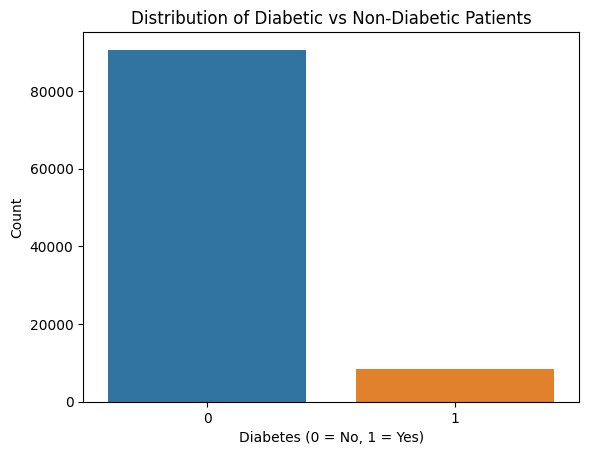

In [122]:
# plot for Distribution of Diabetic vs Non-Diabetic Patients
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetic vs Non-Diabetic Patients')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
# imbalanced dataset 
# 0 -> 90601 (non-diabetes)
# 1 -> 8499 (diabetes)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


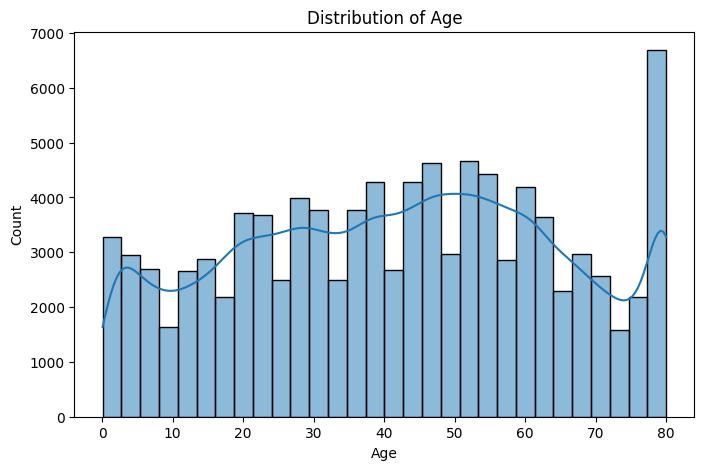

In [123]:
# Histogram plot for Distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


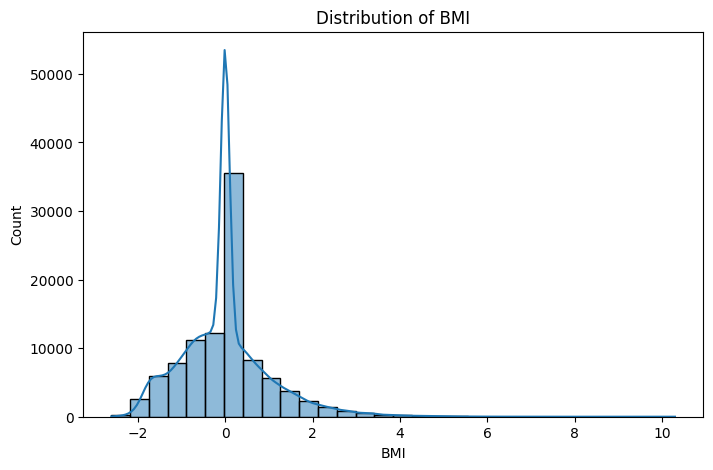

In [124]:
# Histogram plot for Distribution of bmi (scaled)
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


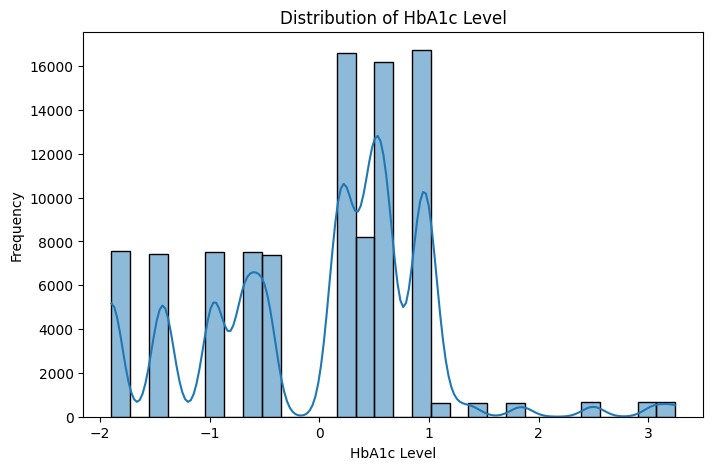

In [125]:
# Histogram plot for Distribution of hbA1c_level (scaled)
plt.figure(figsize=(8,5))
sns.histplot(df['hbA1c_level'], bins=30, kde=True)
plt.title('Distribution of HbA1c Level')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


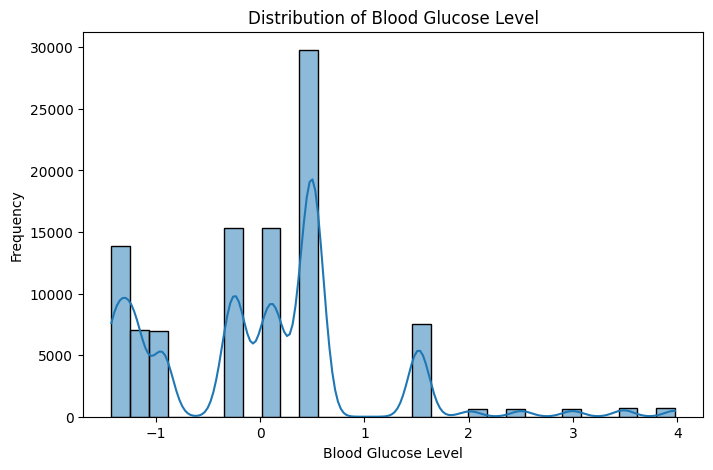

In [130]:
# Histogram plot for Distribution of blood_glucose_level (scaled)
plt.figure(figsize=(8,5))
sns.histplot(df['blood_glucose_level'], bins=30, kde=True)
plt.title("Distribution of Blood Glucose Level")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Frequency")
plt.show()

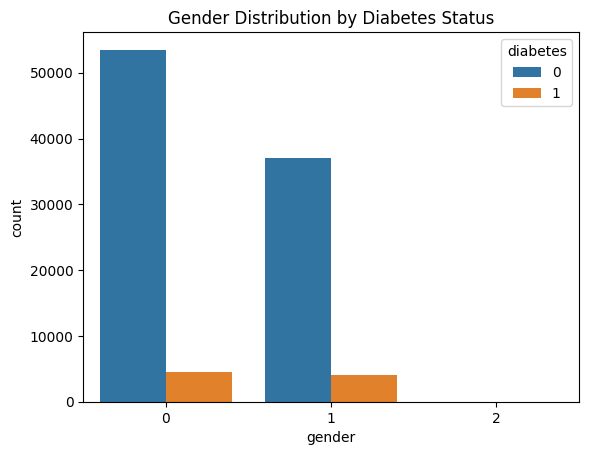

In [127]:
# Countplot of gender split by diabetes status
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Gender Distribution by Diabetes Status')
plt.show()

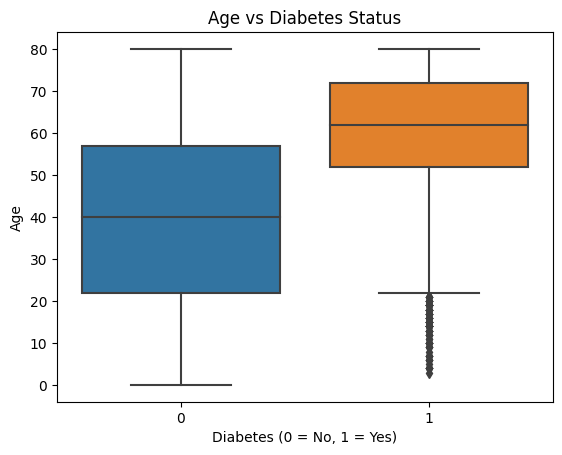

In [131]:
# Age vs Diabetes Status
sns.boxplot(data=df, x='diabetes', y='age')
plt.title('Age vs Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

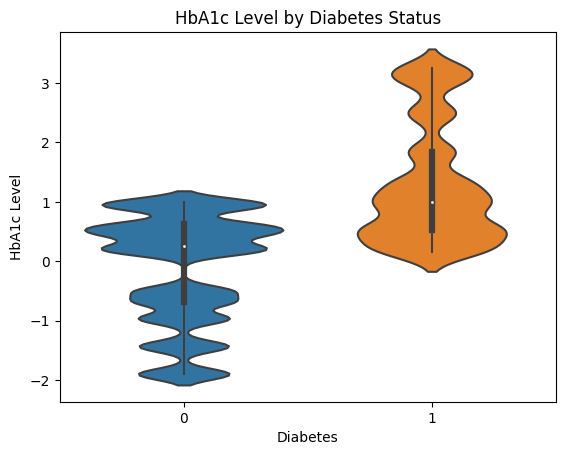

In [132]:
# HbA1c Level by Diabetes Status
sns.violinplot(data=df, x='diabetes', y='hbA1c_level')
plt.title('HbA1c Level by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.show()

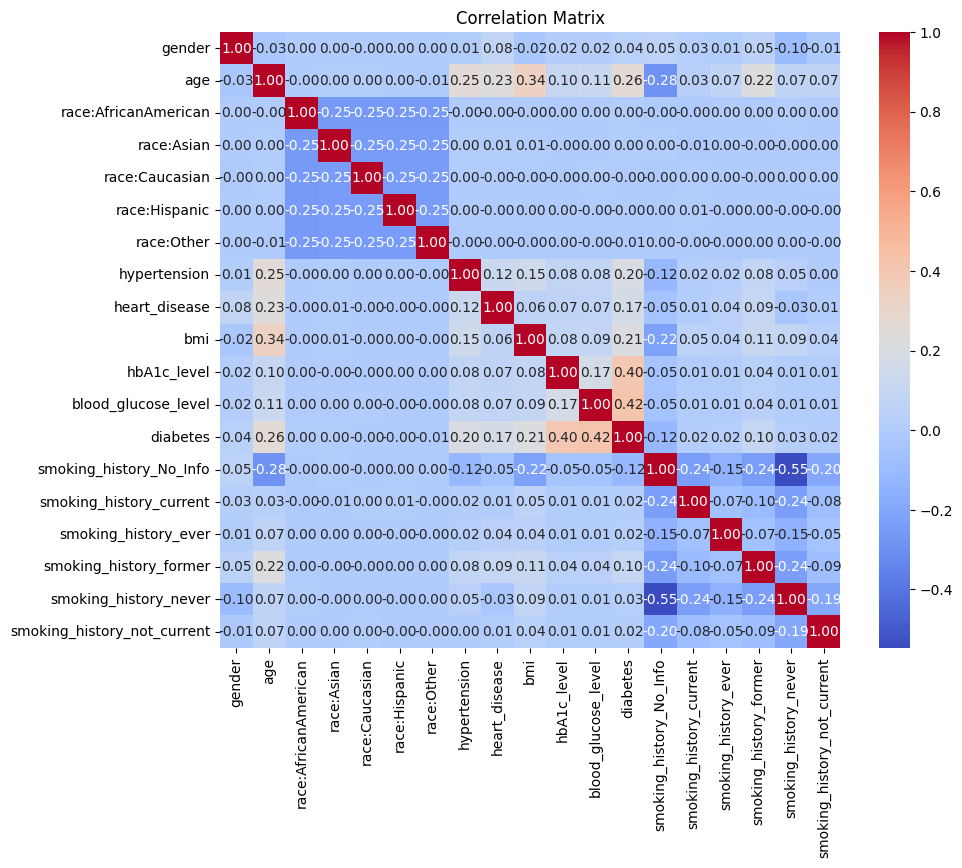

In [133]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identifying patterns, trends, and anomalies

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

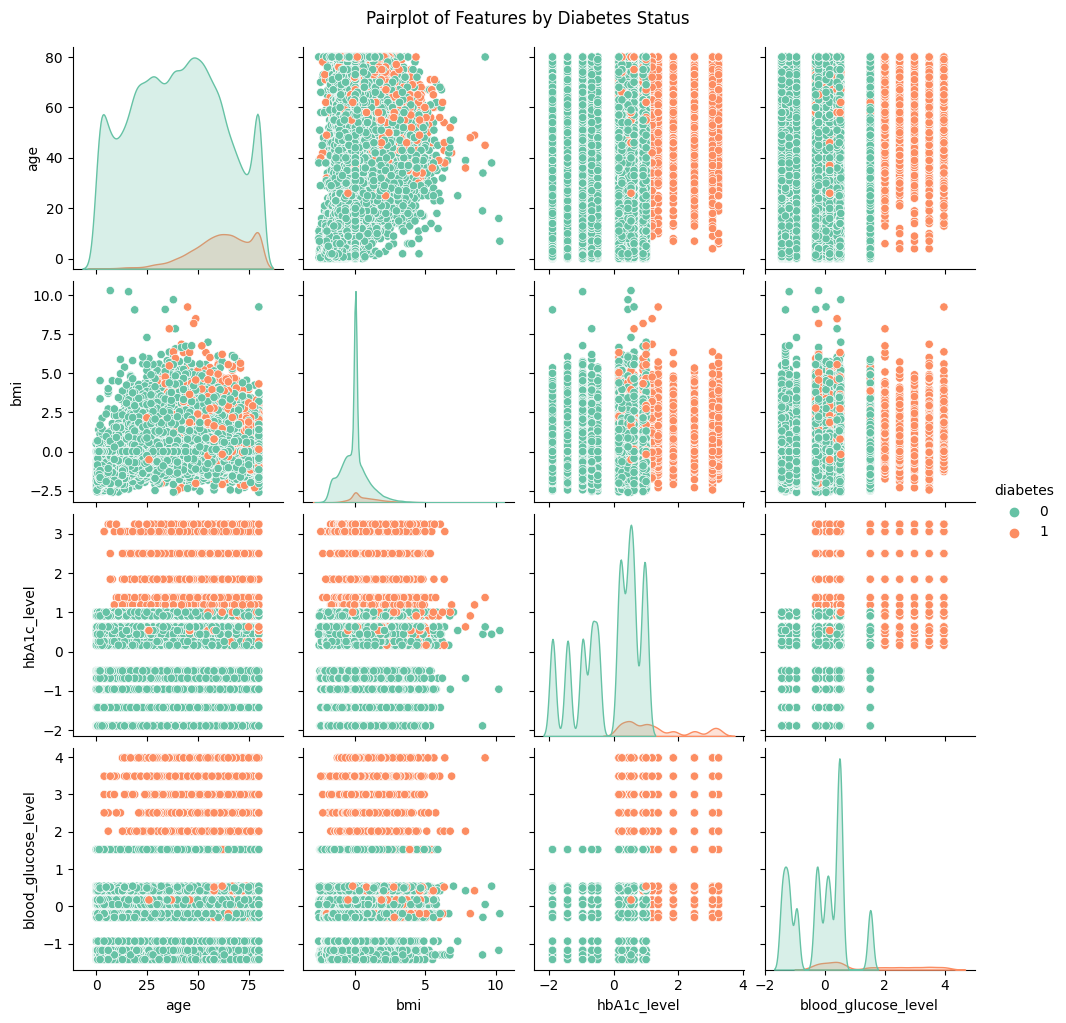

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features to compare visually
features = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']

# Plot pairwise relationships
sns.pairplot(df[features], hue='diabetes', palette='Set2')
plt.suptitle("Pairplot of Features by Diabetes Status", y=1.02)
plt.show()

/tmp/ipykernel_35/4083683535.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_trend = df.groupby('age_group')['diabetes'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


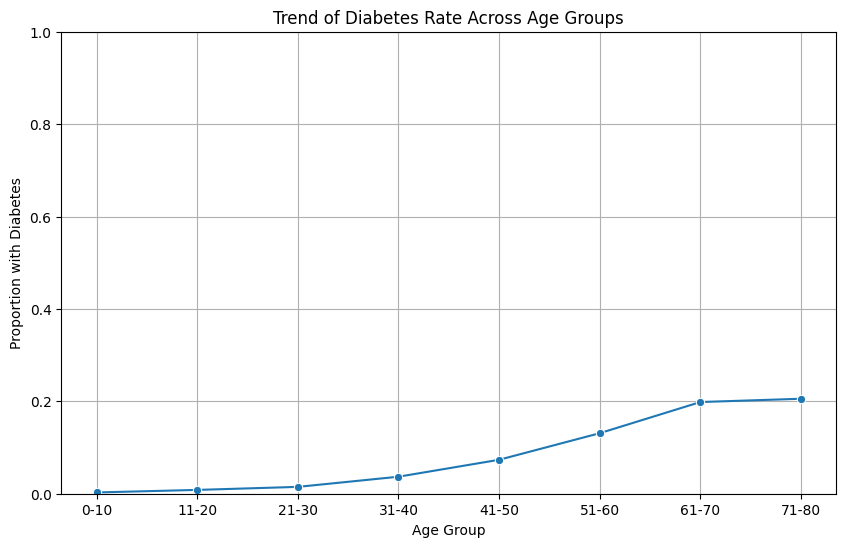

In [135]:
# Pattern between age and Diabetes
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 100],
                         labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100'])

# Group by age group and calculate diabetes rate
age_group_trend = df.groupby('age_group')['diabetes'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_group_trend, x='age_group', y='diabetes', marker='o')
plt.title('Trend of Diabetes Rate Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion with Diabetes')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

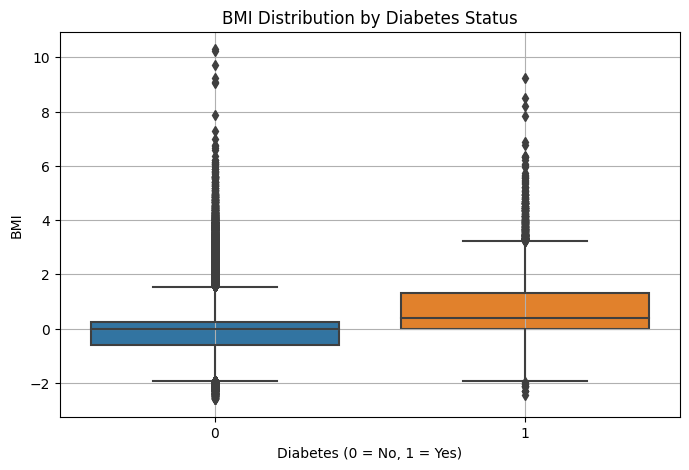

In [137]:
# Pattern between BMI and Diabetes
plt.figure(figsize=(8, 5))
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('Scaled BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

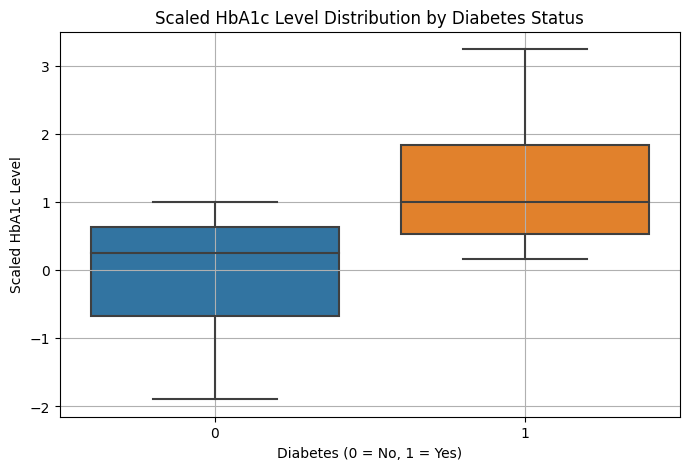

In [138]:
# Pattern between HbA1c and Diabetes
plt.figure(figsize=(8, 5))
sns.boxplot(x='diabetes', y='hbA1c_level', data=df)
plt.title('Scaled HbA1c Level Distribution by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Scaled HbA1c Level')
plt.grid(True)
plt.show()

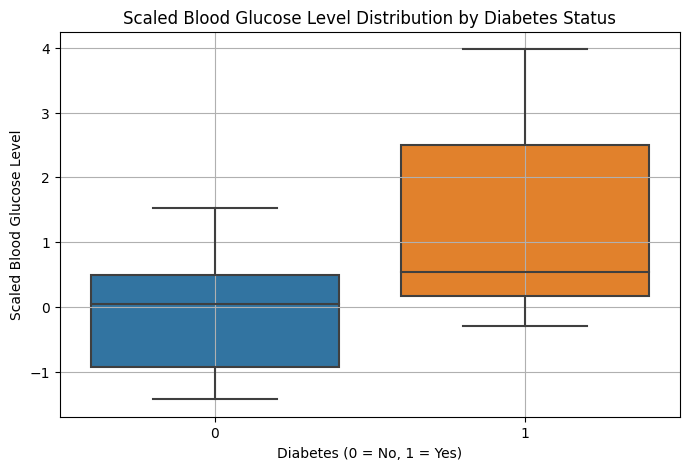

In [139]:
# Blood Glucose Level vs Diabetes
plt.figure(figsize=(8, 5))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Scaled Blood Glucose Level Distribution by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Scaled Blood Glucose Level')
plt.grid(True)
plt.show()

# Handling outliers & data transformations

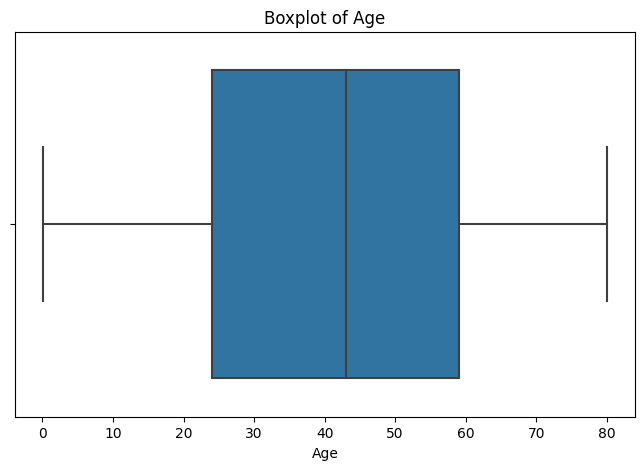

In [140]:
# Boxplot for Age to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

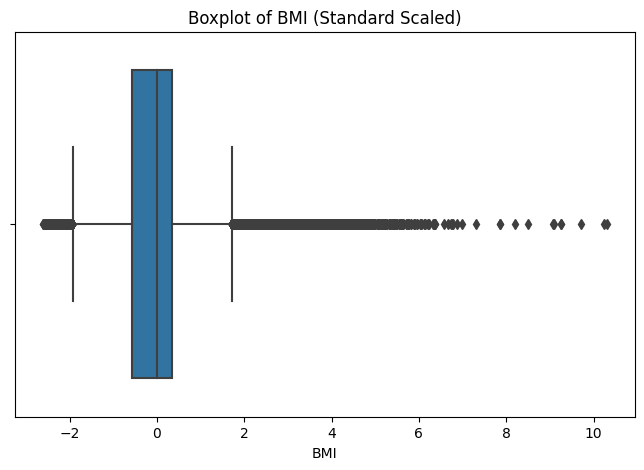

In [143]:
# Boxplot for BMI to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI (Standard Scaled)')
plt.xlabel('BMI')
plt.show()

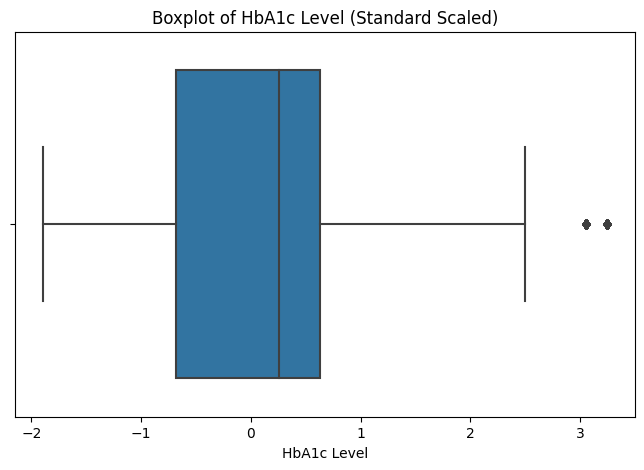

In [144]:
# Boxplot for HbA1c Level to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['hbA1c_level'])
plt.title('Boxplot of HbA1c Level (Standard Scaled)')
plt.xlabel('HbA1c Level')
plt.show()

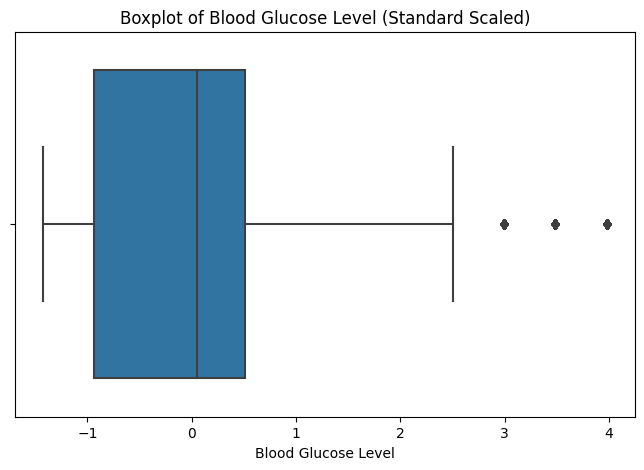

In [145]:
# Boxplot for Blood Glucose Level to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['blood_glucose_level'])
plt.title('Boxplot of Blood Glucose Level (Standard Scaled)')
plt.xlabel('Blood Glucose Level')
plt.show()

In [148]:
# IQR method to detect outliers in Age
Q1_age = df['age'].quantile(0.25)   # 25th percentile
Q3_age = df['age'].quantile(0.75)   # 75th percentile
IQR_age = Q3_age - Q1_age                   # Interquartile Range

# Define outlier boundaries
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Detect outliers
outliers_age = df[(df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)]
print(f"Number of outliers in 'age': {len(outliers_age)}")

Number of outliers in 'age': 0


In [149]:
# IQR method to detect outliers in BMI
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

# Define outlier boundaries
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Detect outliers
outliers_bmi = df[(df['bmi'] < lower_bound_bmi) | (df['bmi'] > upper_bound_bmi)]
print(f"Number of outliers in 'bmi': {len(outliers_bmi)}")

Number of outliers in 'bmi': 6623


In [150]:
# IQR method for hbA1c_level
Q1_hba1c = df['hbA1c_level'].quantile(0.25)
Q3_hba1c = df['hbA1c_level'].quantile(0.75)
IQR_hba1c = Q3_hba1c - Q1_hba1c

lower_bound_hba1c = Q1_hba1c - 1.5 * IQR_hba1c
upper_bound_hba1c = Q3_hba1c + 1.5 * IQR_hba1c

outliers_hba1c = df[(df['hbA1c_level'] < lower_bound_hba1c) | (df['hbA1c_level'] > upper_bound_hba1c)]
print(f"Number of outliers in 'hbA1c_level': {len(outliers_hba1c)}")

Number of outliers in 'hbA1c_level': 1315


In [151]:
# IQR method for blood_glucose_level
Q1_bg = df['blood_glucose_level'].quantile(0.25)
Q3_bg = df['blood_glucose_level'].quantile(0.75)
IQR_bg = Q3_bg - Q1_bg

lower_bound_bg = Q1_bg - 1.5 * IQR_bg
upper_bound_bg = Q3_bg + 1.5 * IQR_bg

outliers_bg = df[(df['blood_glucose_level'] < lower_bound_bg) | (df['blood_glucose_level'] > upper_bound_bg)]
print(f"Number of outliers in 'blood_glucose_level': {len(outliers_bg)}")

Number of outliers in 'blood_glucose_level': 2037


In [152]:
# Cap/floor BMI outliers using IQR boundaries
df['bmi_capped'] = df['bmi'].copy()

df.loc[df['bmi_capped'] < lower_bound_bmi, 'bmi_capped'] = lower_bound_bmi
df.loc[df['bmi_capped'] > upper_bound_bmi, 'bmi_capped'] = upper_bound_bmi

# Check new outliers count after capping
outliers_bmi_capped = df[(df['bmi_capped'] < lower_bound_bmi) | (df['bmi_capped'] > upper_bound_bmi)]
print(f"Outliers in capped BMI: {len(outliers_bmi_capped)}")

Outliers in capped BMI: 0


In [153]:
# Cap/floor hbA1c outliers using IQR boundaries
df['hbA1c_capped'] = df['hbA1c_level'].copy()
df.loc[df['hbA1c_capped'] < lower_bound_hba1c, 'hbA1c_capped'] = lower_bound_hba1c
df.loc[df['hbA1c_capped'] > upper_bound_hba1c, 'hbA1c_capped'] = upper_bound_hba1c

outliers_hba1c_capped = df[(df['hbA1c_capped'] < lower_bound_hba1c) | (df['hbA1c_capped'] > upper_bound_hba1c)]
print(f"Outliers in capped hbA1c_level: {len(outliers_hba1c_capped)}")

Outliers in capped hbA1c_level: 0


In [154]:
# Cap/floor blood_glucose_level outliers using IQR boundaries
df['blood_glucose_capped'] = df['blood_glucose_level'].copy()
df.loc[df['blood_glucose_capped'] < lower_bound_bg, 'blood_glucose_capped'] = lower_bound_bg
df.loc[df['blood_glucose_capped'] > upper_bound_bg, 'blood_glucose_capped'] = upper_bound_bg

outliers_bg_capped = df[(df['blood_glucose_capped'] < lower_bound_bg) | (df['blood_glucose_capped'] > upper_bound_bg)]
print(f"Outliers in capped blood_glucose_level: {len(outliers_bg_capped)}")

Outliers in capped blood_glucose_level: 0


#  Initial visual representation of key findings

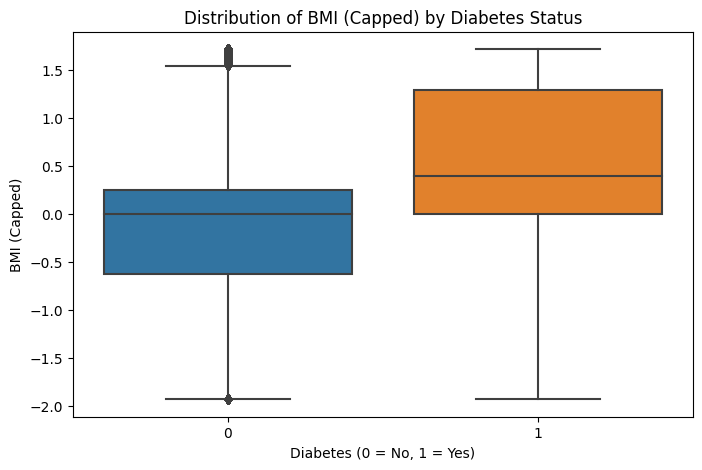

In [155]:
# Distribution of BMI (Capped) by Diabetes Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='diabetes', y='bmi_capped', data=df)
plt.title('Distribution of BMI (Capped) by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BMI (Capped)')
plt.show()

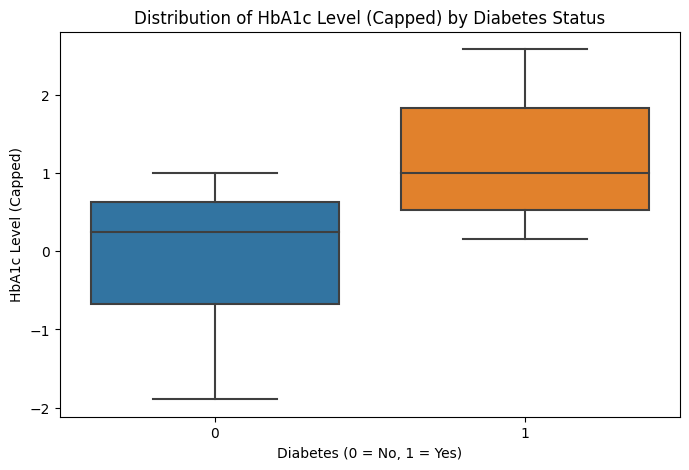

In [156]:
# Distribution of HbA1c Level (Capped) by Diabetes Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='diabetes', y='hbA1c_capped', data=df)
plt.title('Distribution of HbA1c Level (Capped) by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('HbA1c Level (Capped)')
plt.show()

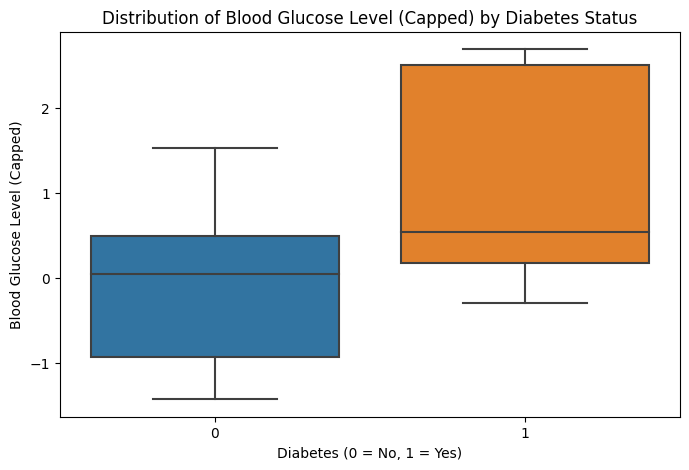

In [157]:
# Distribution of Blood Glucose Level (Capped) by Diabetes Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='diabetes', y='blood_glucose_capped', data=df)
plt.title('Distribution of Blood Glucose Level (Capped) by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Blood Glucose Level (Capped)')
plt.show()